## Objective: Analyze data related to Entertainment.

### Entertainment can be anything that provides enjoyment and amusement. So here we consider the field which entertained us the most, during the difficult days of the Covid-19 lockdowns – The Movies. Since the movie theatres were shut down and Television channels were helplessly re-telecasting episodes of old shows, we were forced to seek new forms of digital entertainment. This triggered the sudden boom in OTT(Over-the-Top) platforms both in terms of viewership and the quantity of the content. The significance of OTT platforms ,as a form of entertainment, in the current scenario motivated us to choose the data related to Movies on the top OTT platforms - Netflix, Hulu, Prime video and Disney +.

The dataset contains the following columns:
* Title: The Title of the Movie
* Year: The Year in which the Movie was released
* Age: Age Required for watching the movie
* IMDb: The IMDb Score of the Movie (out of 10)
* Rotten Tomatoes: The Rotten Tomatoes Score of the Movie (out of 100)
* Netflix: Whether the movie is present on Netflix or not (1 for True, 0 for False)
* Hulu: Whether the movie is present on Hulu or not (1 for True, 0 for False)
* Prime Video: Whether the movie is present on Prime Video or not (1 for True, 0 for False)
* Disney+: Whether the movie is present on Disney+ or not (1 for True, 0 for False)
* Directors: Director(s) of the Movie
* Genres: Genres of the Movies
* Country: Countries in which the movie was directed
* Language: Language(s) in which the movie is available

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data to python

In [2]:
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.set_index("ID",inplace=True)

In [5]:
df.shape

(9515, 15)

In [6]:
#Removing the "+" sign from age 
df['Age']=df['Age'].str.replace('+','',regex=True)

In [7]:
#Converting it to numeric 
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [8]:
#Converting the percentages to number in  "Rotten Tomatoes"
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.replace('/100','')
df['Rotten Tomatoes']=pd.to_numeric(df['Rotten Tomatoes'])
#Converting the percentages to number in  "IMDb"
df['IMDb']=df['IMDb'].str.replace('/10','')
df['IMDb']=pd.to_numeric(df['IMDb'])

In [9]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,The Irishman,2019,18.0,7.8,98.0,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
2,Dangal,2016,7.0,8.4,97.0,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
3,David Attenborough: A Life on Our Planet,2020,7.0,9.0,95.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
4,Lagaan: Once Upon a Time in India,2001,7.0,8.1,94.0,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
5,Roma,2018,18.0,7.7,94.0,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [10]:
#check for null values
df.isnull().sum()

Title                 0
Year                  0
Age                4875
IMDb                206
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           411
Genres              116
Country             254
Language            313
Runtime             319
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515 entries, 1 to 9515
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              4640 non-null   float64
 3   IMDb             9309 non-null   float64
 4   Rotten Tomatoes  9508 non-null   float64
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Type             9515 non-null   int64  
 10  Directors        9104 non-null   object 
 11  Genres           9399 non-null   object 
 12  Country          9261 non-null   object 
 13  Language         9202 non-null   object 
 14  Runtime          9196 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum()/len(df)*100

Title               0.000000
Year                0.000000
Age                51.234892
IMDb                2.165003
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.319496
Genres              1.219128
Country             2.669469
Language            3.289543
Runtime             3.352601
dtype: float64

### Insights:
    1. There are 51% of null values in age.
    2. In column Genres,Directors,country,language,IMDb,Rotten Tomatoes and runtime also have a null values.

# Data Preprocessing

## 1. Handling missing values 

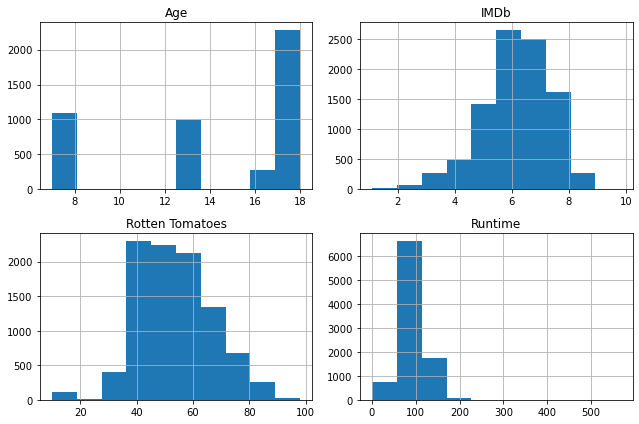

In [13]:
freqgraph=df.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

In [14]:
#handling missing values in "Age"

#Filling missing values of "Age" with mean.
df['Age']=df['Age'].fillna(df['Age'].mean())

In [15]:
#handling missing values in "IMDb"

#filling missing values of "IMDb" with mean.
df['IMDb']=df['IMDb'].fillna(df['IMDb'].mean())

In [16]:
#handling missing values in "Rotten Tomatoes"

#filling missing values of "Rotten Tomatoes" with mean.
df['Rotten Tomatoes']=df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean())

## 2. Feature Reduction

In [17]:
df = df.dropna()

In [18]:
df = df.drop(['Type'], axis=1)

In [19]:
df.isnull().sum()

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

In [20]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,
1,The Irishman,2019,18.0,7.8,98.0,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
2,Dangal,2016,7.0,8.4,97.0,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
3,David Attenborough: A Life on Our Planet,2020,7.0,9.0,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
4,Lagaan: Once Upon a Time in India,2001,7.0,8.1,94.0,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
6,To All the Boys I've Loved Before,2018,13.0,7.1,94.0,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


## 3.Encoding

In [36]:
df1=df.drop('Title',axis=1)

In [37]:
df1 = pd.concat([df1.drop('Genres', 1), df['Genres'].str.get_dummies(sep=",")], 1)

In [38]:
df1 = pd.concat([df1.drop('Language', 1), df['Language'].str.get_dummies(sep=",")], 1)

In [39]:
df1 = pd.concat([df1.drop('Country', 1), df['Country'].str.get_dummies(sep=",")], 1)

In [40]:
df1=df1.join(df[['Genres','Language','Country']],sort=False)

In [41]:
df1

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Runtime,...,United States,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country
ID,,,,,,,,,,,,,,,,,,,,,
1,2019,18.000000,7.800000,98.0,1,0,0,0,Martin Scorsese,209.0,...,1,0,0,0,0,0,0,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",United States
2,2016,7.000000,8.400000,97.0,1,0,0,0,Nitesh Tiwari,161.0,...,1,0,0,0,0,0,0,"Action,Biography,Drama,Sport","Hindi,English","India,United States,United Kingdom,Australia,K..."
3,2020,7.000000,9.000000,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",83.0,...,0,0,0,0,0,0,0,"Documentary,Biography",English,United Kingdom
4,2001,7.000000,8.100000,94.0,1,0,0,0,Ashutosh Gowariker,224.0,...,0,0,0,0,0,0,0,"Drama,Musical,Sport","Hindi,English","India,United Kingdom"
6,2018,13.000000,7.100000,94.0,1,0,0,0,Susan Johnson,99.0,...,1,0,0,0,0,0,0,"Comedy,Drama,Romance",English,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,1980,14.221552,5.600000,34.0,0,0,0,1,Edward M. Abroms,60.0,...,1,0,0,0,0,0,0,"Adventure,Drama,Family",English,United States
9496,2021,16.000000,7.300000,33.0,0,0,0,1,"Aiji Okazaki,Kentaro Takayanagi",47.0,...,1,0,0,0,0,0,0,"Documentary,Music",Japanese,"United States,Japan"
9497,2020,14.221552,5.300000,33.0,0,0,0,1,Trevor Moore,22.0,...,1,0,0,0,0,0,0,"Comedy,Family,Musical",English,United States


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df1["Directors"]=encoder.fit_transform(df1["Directors"])
df1["Country"]=encoder.fit_transform(df1["Country"])
df1["Language"]=encoder.fit_transform(df1["Language"])
df1["Genres"]=encoder.fit_transform(df1["Genres"])

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8788 entries, 1 to 9512
Columns: 319 entries, Year to Country
dtypes: float64(4), int32(4), int64(311)
memory usage: 21.6 MB


## Exploratory Data Anlaysis

In [44]:
df1.describe()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Runtime,...,United States,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country
count,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.00000,8788.000000,...,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000
mean,2007.056554,14.244813,6.156354,54.378988,0.383022,0.113905,0.437301,0.093878,3241.11254,96.573737,...,0.638371,0.001252,0.000455,0.000455,0.002048,0.000341,0.000114,836.492148,217.803823,550.587961
std,19.351789,3.146583,1.153292,12.811841,0.486151,0.317714,0.496081,0.291676,1848.53785,27.931856,...,0.480500,0.035359,0.021331,0.021331,0.045214,0.018474,0.010667,361.471025,235.364515,219.408710
min,1914.000000,7.000000,1.100000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,14.221552,5.500000,45.000000,0.000000,0.000000,0.000000,0.000000,1637.75000,86.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,638.000000,66.000000,372.750000
50%,2015.000000,14.221552,6.300000,53.000000,0.000000,0.000000,0.000000,0.000000,3256.50000,95.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,888.000000,66.000000,698.000000
75%,2018.000000,16.000000,7.000000,63.000000,1.000000,0.000000,1.000000,0.000000,4847.25000,109.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1127.000000,370.000000,698.000000
max,2021.000000,18.000000,9.800000,98.000000,1.000000,1.000000,1.000000,1.000000,6397.00000,359.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1361.000000,798.000000,891.000000


### overall year of release analysis

<AxesSubplot:xlabel='Year', ylabel='Count'>

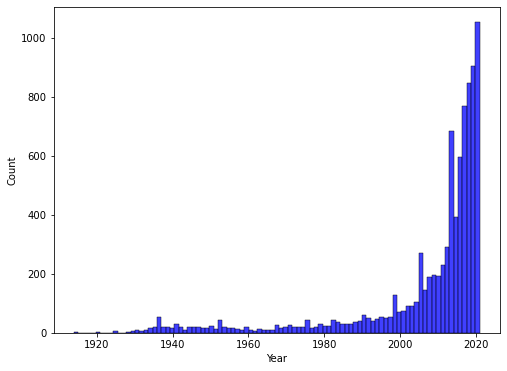

In [25]:
plt.subplots(figsize=(8,6))
sns.histplot(df["Year"],kde=False, color="blue")

### Top 10 Lengthy movies and Runtime

<AxesSubplot:xlabel='Runtime', ylabel='Title'>

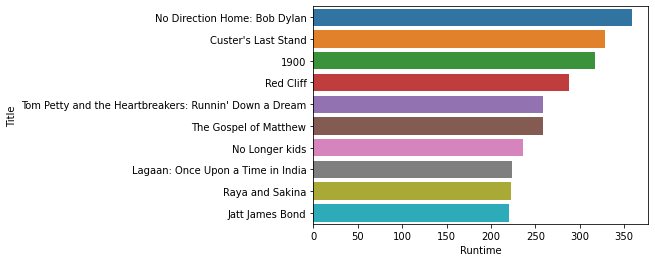

In [26]:
top10_len=df.nlargest(10,'Runtime')[['Title','Runtime']].set_index('Title')
top10_len
sns.barplot(x='Runtime',y=top10_len.index,data=top10_len)

In [27]:
#Platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
netflix = df['Netflix']
pvideo = df['Prime Video']
disney = df['Disney+']
hulu = df['Hulu']

(array([5422., 3366.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

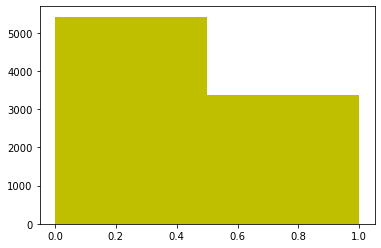

In [28]:
# Showing info if movies are available on Netflix Platform or not (0 = No & 1 = Yes)
plt.hist(netflix, density = False, bins = 2, color = 'y')

5000+ movies are not showing in netflix

(array([4945., 3843.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

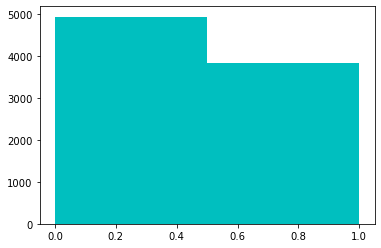

In [29]:
#Showing info if movies are available on Prime Video or not
plt.hist(pvideo, density = False, bins = 2, color = 'c')

4000+ movies are not showing in Prime Video

(array([7963.,  825.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

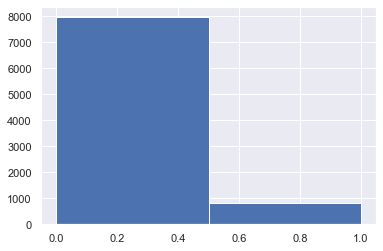

In [45]:
#Showing if movies are available on Disney+ or not
plt.hist(disney, density = False, bins = 2, color = 'b')

7000+ movies are not showing in Disney+

(array([7787., 1001.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

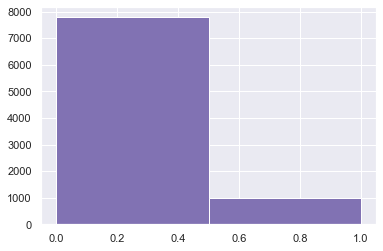

In [46]:
#Showing if movies are available on Hulu platform or not
plt.hist(hulu, density = False, bins = 2, color = 'm')

7000+ movies are not showing in Hulu

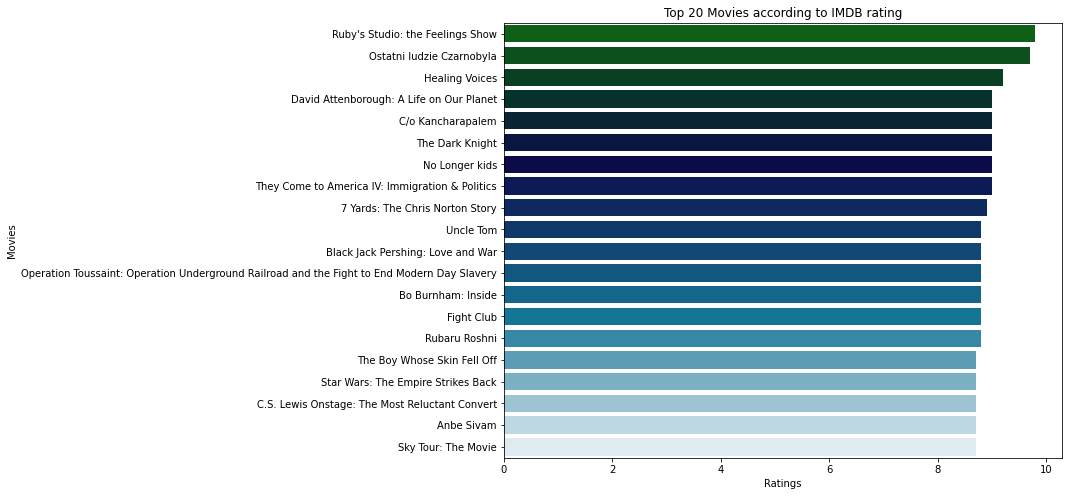

In [32]:
plt.figure(figsize = (10,8))
plt.title("Top 20 Movies according to IMDB rating")
top_20_imdb = df.sort_values(by = "IMDb", ascending = False)[["Title", "IMDb"]][:20]
sns.barplot(data = top_20_imdb, y = "Title", x="IMDb", palette="ocean")
plt.xlabel("Ratings")
plt.ylabel("Movies")
plt.show()

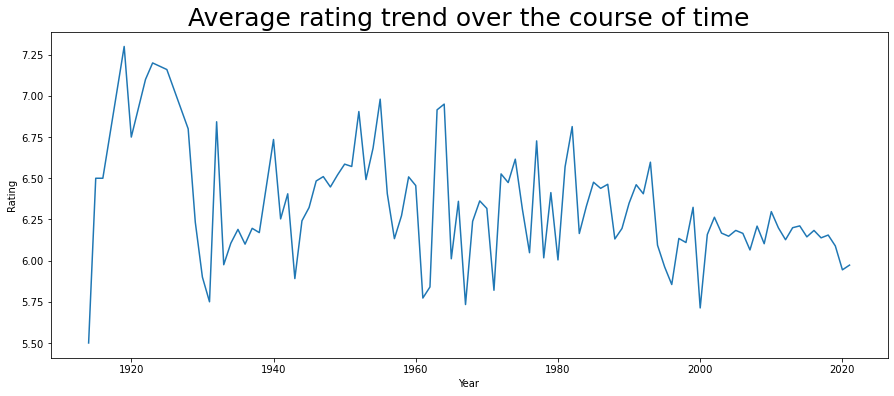

In [33]:
# Track rating year wise
plt.title("Average rating trend over the course of time", size = 25)
_ = df.groupby("Year")["IMDb"].mean().plot(figsize = (15,6))
_ = plt.xlabel("Year")
_ = plt.ylabel("Rating")

Average rating trends of all movies according to year

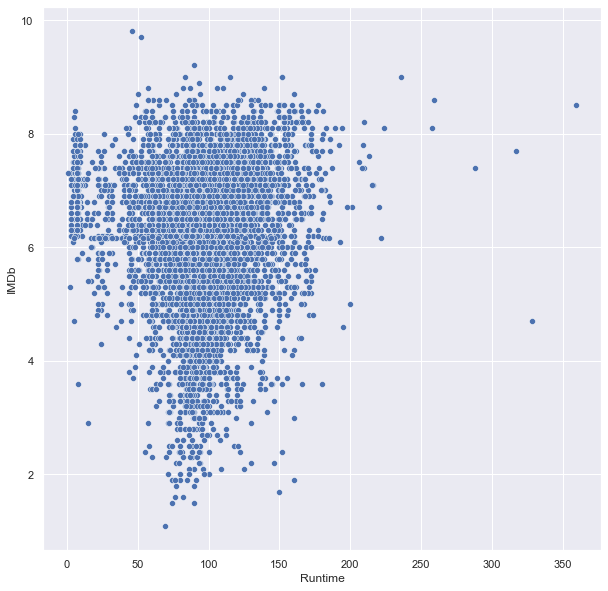

In [34]:
sns.set()
plt.figure(figsize = (10,10))
sns.scatterplot(data =df, y="IMDb", x="Runtime", palette="inferno")
plt.show()

##### IMDb rating based on runtime.
##### Most of films having less than 170 minutes and scattered in range of 2 to 9 IMDb rate

<Figure size 720x720 with 0 Axes>

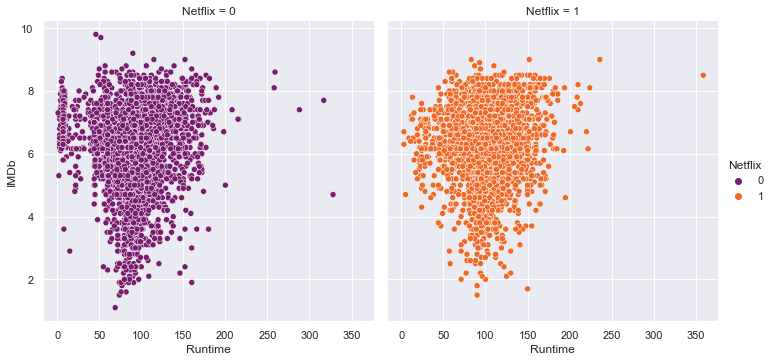

In [48]:
sns.set()
plt.figure(figsize = (10,10))
sns.relplot(data =df, y="IMDb", x="Runtime", col = "Netflix", palette="inferno", hue = "Netflix", kind = "scatter")
plt.show()

##### IMDb rate according to the film runtime, which is present in Netflix or not.
##### In both graph shows with run time less than 200 is most,that is scattered between 2 to 9 IMDb rate

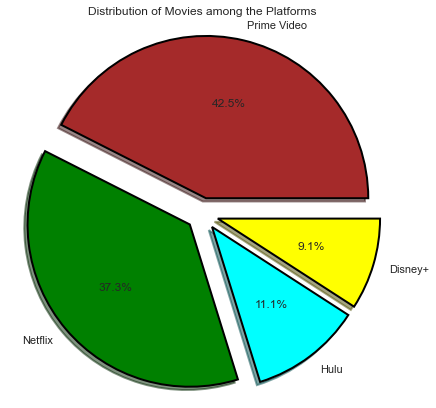

In [49]:
plat_dist = df[["Netflix","Hulu","Prime Video","Disney+"]].sum().sort_values(ascending=False).reset_index()
plat_dist = pd.DataFrame(plat_dist.values, columns=['Platform',"No. of Movies"])
plt.figure(figsize=(7,7))
dt = plat_dist["No. of Movies"]
labels = plat_dist["Platform"]
exp = (0.1,0.1,0.1,0.1)
clr = ( "brown", "green", "cyan", "yellow")
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(dt,labels=labels,autopct='%1.1f%%',explode=exp, colors=clr,shadow=True, wedgeprops=wp)
plt.title('Distribution of Movies among the Platforms')
plt.axis('equal')
plt.show()

##### Graph shows distribution of movies in various platforms.
##### Netflix has 37.2%,Hulu has 11.2%,Prime Video has 42.5%,Disney+ has 9.2%
##### Netflix and Prime Vedio is the popular platform.

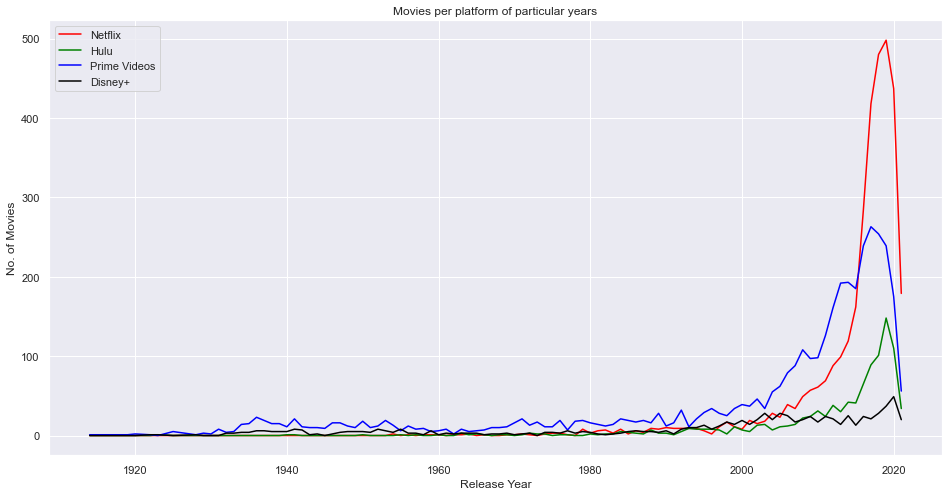

In [50]:
# mpppy => movies per platform per year
mpppy = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
plt.figure(figsize = (16, 8))
sns.lineplot(x=mpppy.index,y=mpppy['Netflix'], color='red', label='Netflix')
sns.lineplot(x=mpppy.index,y=mpppy['Hulu'], color = 'green', label='Hulu')
sns.lineplot(x=mpppy.index,y=mpppy['Prime Video'], color = 'blue', label='Prime Videos')
sns.lineplot(x=mpppy.index,y=mpppy['Disney+'], color = 'black', label='Disney+')
plt.title("Movies per platform of particular years")
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('No. of Movies')
plt.show()

##### The graph shows number of movies released on particular year.
##### In 2020 Most of film are released through online platforms

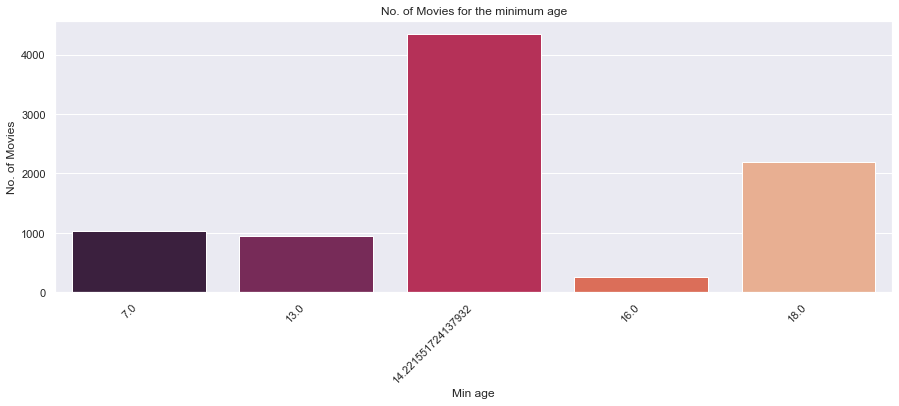

In [51]:
df_age = df.Age.value_counts().reset_index()
df_age = pd.DataFrame(df_age.values, columns = ['Age', "No. of Movies"]).sort_values('No. of Movies',ascending=False)
plt.figure(figsize = (15,5))
ax = sns.barplot(x=df_age["Age"], y= df_age["No. of Movies"], data=df , palette = "rocket")
plt.title ("No. of Movies for the minimum age")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Min age")
plt.ylabel("No. of Movies")
plt.show()

#### The graph shows No. of Movies for the minimum age.
#### The most of films are seen by 13+ age grouos.

## Modeling and Model Fine Tuning

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8788 entries, 1 to 9512
Columns: 319 entries, Year to Country
dtypes: float64(4), int32(4), int64(311)
memory usage: 21.6 MB


In [54]:
data=np.array(df1['IMDb'])
data1=[]
for i in data:
    if 0<=i<3.0:
        data1.append("0")
    if 3.0<=i<5.0:
        data1.append("1")
    if 5.0<=i<8.0:
        data1.append("2")
    if 8.0<=i<9.0:
        data1.append("3")
    if 9.0<=i<10.0:
        data1.append("4")
data1=pd.DataFrame(data1, columns=['Score'])
df1 = pd.concat([df1, data1], axis=1, join='inner')
df1.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Runtime,...,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country,Score
1,2019,18.0,7.8,98.0,1,0,0,0,3858,209.0,...,0,0,0,0,0,0,735,266,698,3
2,2016,7.0,8.4,97.0,1,0,0,0,4373,161.0,...,0,0,0,0,0,0,143,528,318,4
3,2020,7.0,9.0,95.0,1,0,0,0,149,83.0,...,0,0,0,0,0,0,1037,66,578,3
4,2001,7.0,8.1,94.0,1,0,0,0,536,224.0,...,0,0,0,0,0,0,1221,528,313,2
6,2018,13.0,7.1,94.0,1,0,0,0,5748,99.0,...,0,0,0,0,0,0,866,66,698,2


In [55]:
data=np.array(df1['Rotten Tomatoes'])
data1=[]
for i in data:
    if 0<=i<30.0:
        data1.append("0")
    if 30.0<=i<50.0:
        data1.append("1")
    if 50.0<=i<80.0:
        data1.append("2")
    if 80.0<=i<90.0:
        data1.append("3")
    if 90.0<=i<100.0:
        data1.append("4")
data1=pd.DataFrame(data1, columns=['ScoreROTTEN'])
df1 = pd.concat([df1, data1], axis=1, join='inner')
df1.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Runtime,...,Venezuela,Vietnam,West Germany,Yugoslavia,Zimbabwe,Genres,Language,Country,Score,ScoreROTTEN
1,2019,18.0,7.8,98.0,1,0,0,0,3858,209.0,...,0,0,0,0,0,735,266,698,3,4
2,2016,7.0,8.4,97.0,1,0,0,0,4373,161.0,...,0,0,0,0,0,143,528,318,4,4
3,2020,7.0,9.0,95.0,1,0,0,0,149,83.0,...,0,0,0,0,0,1037,66,578,3,4
4,2001,7.0,8.1,94.0,1,0,0,0,536,224.0,...,0,0,0,0,0,1221,528,313,2,4
6,2018,13.0,7.1,94.0,1,0,0,0,5748,99.0,...,0,0,0,0,0,866,66,698,2,4


In [56]:
df1.isna().sum()

Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
                  ..
Genres             0
Language           0
Country            0
Score              0
ScoreROTTEN        0
Length: 321, dtype: int64

In [57]:
x=df1[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime','Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War', 'Crime',
       'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Sport',
       'Documentary', 'Musical', 'News', 'Short', 'Reality-TV', 'Film-Noir',
       'Talk-Show']]

y=df1['Score']
y2=df1['ScoreROTTEN']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=22) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8072607260726072


In [60]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Acuuracy=',accuracy_score(y_pred,y_test),"n_neighbors",n_neighbors-k)

Acuuracy= 0.8072607260726072 n_neighbors 29
Acuuracy= 0.8072607260726072 n_neighbors 28
Acuuracy= 0.8072607260726072 n_neighbors 27
Acuuracy= 0.8072607260726072 n_neighbors 26
Acuuracy= 0.8072607260726072 n_neighbors 25
Acuuracy= 0.8072607260726072 n_neighbors 24
Acuuracy= 0.8072607260726072 n_neighbors 23
Acuuracy= 0.8072607260726072 n_neighbors 22
Acuuracy= 0.8072607260726072 n_neighbors 21
Acuuracy= 0.8072607260726072 n_neighbors 20
Acuuracy= 0.8066006600660066 n_neighbors 19
Acuuracy= 0.807920792079208 n_neighbors 18
Acuuracy= 0.805940594059406 n_neighbors 17
Acuuracy= 0.8072607260726072 n_neighbors 16
Acuuracy= 0.803960396039604 n_neighbors 15
Acuuracy= 0.803960396039604 n_neighbors 14
Acuuracy= 0.803960396039604 n_neighbors 13
Acuuracy= 0.8046204620462046 n_neighbors 12
Acuuracy= 0.803960396039604 n_neighbors 11
Acuuracy= 0.801980198019802 n_neighbors 10
Acuuracy= 0.8 n_neighbors 9
Acuuracy= 0.7973597359735973 n_neighbors 8
Acuuracy= 0.7947194719471947 n_neighbors 7
Acuuracy= 0.7

In [61]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6633663366336634


In [62]:
print("accuracy is :",accuracy_score(y_test,y_pred))

accuracy is : 0.6633663366336634


In [63]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics
max=0 
for i in range(1,40):
  clf=RandomForestClassifier(n_estimators=i)  #Creating a random forest with 100 decision trees
  clf.fit(x_train, y_train)  #Training our model
  y_pred=clf.predict(x_test) #testing our model
  if ( max < metrics.accuracy_score(y_test, y_pred)):
    max=metrics.accuracy_score(y_test, y_pred)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred)," i= ",i) 

Accuracy: 0.6818481848184819  i=  1
Accuracy: 0.6475247524752475  i=  2
Accuracy: 0.7148514851485148  i=  3
Accuracy: 0.7155115511551156  i=  4
Accuracy: 0.7683168316831683  i=  5
Accuracy: 0.7491749174917491  i=  6
Accuracy: 0.7729372937293729  i=  7
Accuracy: 0.765016501650165  i=  8
Accuracy: 0.7709570957095709  i=  9
Accuracy: 0.7782178217821782  i=  10
Accuracy: 0.7834983498349835  i=  11
Accuracy: 0.7821782178217822  i=  12
Accuracy: 0.7907590759075908  i=  13
Accuracy: 0.7834983498349835  i=  14
Accuracy: 0.7940594059405941  i=  15
Accuracy: 0.7867986798679868  i=  16
Accuracy: 0.7894389438943894  i=  17
Accuracy: 0.7907590759075908  i=  18
Accuracy: 0.7947194719471947  i=  19
Accuracy: 0.7927392739273927  i=  20
Accuracy: 0.7920792079207921  i=  21
Accuracy: 0.7907590759075908  i=  22
Accuracy: 0.7894389438943894  i=  23
Accuracy: 0.7947194719471947  i=  24
Accuracy: 0.7973597359735973  i=  25
Accuracy: 0.7920792079207921  i=  26
Accuracy: 0.7960396039603961  i=  27
Accuracy: 0

In [64]:
print(max)

0.8


### KNN is the best model with Accuracy=  0.8172554347826086  and n_neighbor= 29

In [65]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train,y_train)
X_test_scaled = scaler.transform(x_test)
y_pred = knn.predict(X_test_scaled)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8072607260726072
